In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score  

In [2]:
# Load CSV file
data = pd.read_csv('mnist_train.csv')

# Prepare data
labels = data['label'].copy().to_numpy()
features = data.drop('label', axis=1).to_numpy()

In [3]:
# Split data into a train and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [4]:
# Find highest accuracy based on k (n_neighbors) with default test_size = 0.2

accuracies = []

for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train classifier
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with k={k}: {accuracy}")

best_k = np.argmax(accuracies) + 1
print(f"\nThe highest accuracy is achieved with k={best_k}: {accuracies[best_k-1]}")

"""""
Result: 

Accuracy with k=1: 0.9740833333333333
Accuracy with k=2: 0.9640833333333333
Accuracy with k=3: 0.9726666666666667
Accuracy with k=4: 0.9715833333333334
Accuracy with k=5: 0.9715
Accuracy with k=6: 0.9705833333333334
Accuracy with k=7: 0.9695833333333334
Accuracy with k=8: 0.9684166666666667
Accuracy with k=9: 0.9673333333333334

The highest accuracy is achieved with k=1: 0.9740833333333333
"""""

Accuracy with k=1: 0.9740833333333333
Accuracy with k=2: 0.9640833333333333
Accuracy with k=3: 0.9726666666666667
Accuracy with k=4: 0.9715833333333334
Accuracy with k=5: 0.9715
Accuracy with k=6: 0.9705833333333334
Accuracy with k=7: 0.9695833333333334
Accuracy with k=8: 0.9684166666666667
Accuracy with k=9: 0.9673333333333334

The highest accuracy is achieved with k=1: 0.9740833333333333


In [5]:
# Find highest accuracy based on the test_size

accuracies = []

test_size = [0.1, 0.2, 0.3, 0.4, 0.5]

for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=i, random_state=42)

    # Training and predicttion
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy with test_size={i}: {accuracy}")

max = np.argmax(accuracies)
best_test_size = test_size[max]
print(f"\nThe highest accuracy is achieved by the test_size={best_test_size}: {accuracies[max]}")

"""""
Result:

Accuracy with test_size=0.1: 0.9756666666666667
Accuracy with test_size=0.2: 0.9740833333333333
Accuracy with test_size=0.3: 0.9705555555555555
Accuracy with test_size=0.4: 0.9684583333333333
Accuracy with test_size=0.5: 0.9653

The highest accuracy is achieved by the test_size=0.1: 0.9756666666666667
"""""

Accuracy with test_size=0.1: 0.9756666666666667
Accuracy with test_size=0.2: 0.9740833333333333
Accuracy with test_size=0.3: 0.9705555555555555
Accuracy with test_size=0.4: 0.9684583333333333
Accuracy with test_size=0.5: 0.9653
The highest accuracy is achieved by the test_size=0.1: 0.9756666666666667


In [6]:
# Perform classification based on best_k and best_test_size

# best_k = 1
# best_test_size = 0.1

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=best_test_size, random_state=42)

# Training and predicttion
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9756666666666667


misclassified_indices: [47, 167, 173, 186, 222, 231, 248, 272, 287, 293, 381, 404, 406, 439, 488, 499, 586, 614, 645, 663, 675, 685, 709, 729, 763, 932, 1014, 1040, 1099, 1103, 1124, 1173, 1184, 1192, 1362, 1384, 1394, 1433, 1436, 1514, 1537, 1547, 1643, 1660, 1688, 1726, 1777, 1789, 1815, 1888, 1968, 1974, 1994, 2053, 2060, 2116, 2120, 2122, 2157, 2243, 2306, 2325, 2344, 2368, 2546, 2585, 2591, 2607, 2615, 2638, 2675, 2743, 2753, 2796, 2871, 2887, 2901, 2904, 2950, 3053, 3075, 3082, 3093, 3136, 3157, 3176, 3186, 3200, 3212, 3258, 3263, 3265, 3270, 3294, 3357, 3382, 3464, 3602, 3690, 3828, 3831, 3894, 3922, 3974, 3997, 4043, 4141, 4235, 4334, 4346, 4364, 4380, 4387, 4392, 4407, 4456, 4502, 4553, 4667, 4732, 4769, 4793, 4821, 4860, 4969, 5149, 5167, 5227, 5236, 5262, 5304, 5347, 5365, 5427, 5436, 5438, 5478, 5503, 5597, 5627, 5698, 5751, 5824, 5937, 5947, 5951]
number of misclassified images: 146
number of test images: 6000
accuracy: 0.9756666666666667


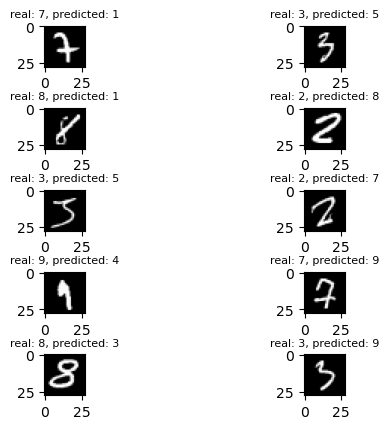

In [9]:
# get missclassified data
import matplotlib.pyplot as plt
import random

# y_test: correct label
# y_pred: predicited label

# Find indices where predicted labels don't match the true labels
misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test[i]]

print(f"misclassified_indices: {misclassified_indices}")
print(f"number of misclassified images: {len(misclassified_indices)}")
print(f"number of test images: {len(y_test)}")
print(f"accuracy: {1- len(misclassified_indices) / len(y_test)}")

random_misclassified_indices = random.sample(misclassified_indices, k=10)
i=1

for id in random_misclassified_indices:
    image = X_test[id].reshape(28, 28)
    label = "real: " + str(y_test[id]) + ", predicted: " + str(y_pred[id])
    plt.subplot(5,2,i)
    plt.imshow(image, cmap='gray')
    plt.title("{}".format(label),fontsize=8)
    plt.subplots_adjust(hspace=1, wspace=0.1)
    i+=1
    
   
plt.show()